c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006
c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)
train loss:2.3127285960210404
=== epoch:1, train acc:0.06, test acc:0.0951 ===
train loss:2.3119643887119783
train loss:2.2982085941421193
train loss:2.3100491883281347
=== epoch:2, train acc:0.05333333333333334, test acc:0.0945 ===
train loss:2.316437051670737
train loss:2.3170462309288684
train loss:2.321903397259049
=== epoch:3, train acc:0.05333333333333334, test acc:0.0948 ===
train loss:2.3101990920620707
train loss:2.318061399977749
train loss:2.310576211697662
=== epoch:4, train acc:0.05, test acc:0.095 ===
train loss:2.31422050894742
train loss:2.3159647198408253
train loss:2.2984841214965317
=== epoch:5, train acc:0.05333333333333334, test acc:0.0976 ===
train loss:2.297437036006553
train loss:2.307848501693417
train loss:2.3024614212960857
=== epoch:6, train acc:0.056666666666666664, test acc:0.0976 ===
train loss:2.298770255494081
train loss:2.3054038545371
train loss:2.290717

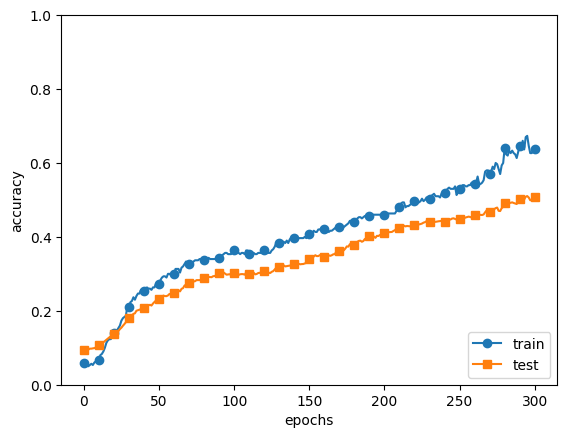

In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ==============
use_dropout = True # 드롭아웃을 사용하지 않는경우 False
dropout_ratio = 0.2
# ============================================

network = MultiLayerNetExtend(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100],
        output_size =10, use_dropout = use_dropout, dropout_ration = dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=301, mini_batch_size = 100,optimizer='sgd', optimizer_param = {'lr': 0.01}, verbose = True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list
    
# 그래프 그리기==========
markers = {'train' : 'o', "test" : "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', markevery=10, label = 'train')
plt.plot(x, test_acc_list, marker='s', markevery=10, label = 'test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc = 'lower right')
plt.show()

